# Training Python Day 2 (23 Februari 2019)
# Pemateri: Christopher Salim

## Identifikasi Fasies dari Data GR Log menggunakan Metode Machine Learning: Multiparameter 

In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/home/christophersalim_/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('traindata7real.csv')
test = pd.read_csv('testdata7real.csv')

In [4]:
train.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,1,A1 SH,ALEXANDER D,2887.5,88.71,0.612,6.7,10.605,NaN,1,1.000
1,1,A1 SH,ALEXANDER D,2888.0,92.71,0.583,11.0,12.515,NaN,1,0.974
2,1,A1 SH,ALEXANDER D,2888.5,94.54,0.579,12.0,13.410,NaN,1,0.949
3,1,A1 SH,ALEXANDER D,2889.0,95.31,0.579,11.5,13.750,NaN,1,0.923
4,1,A1 SH,ALEXANDER D,2889.5,93.79,0.572,10.3,13.405,NaN,1,0.897


In [5]:
train.tail()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3673,3,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3674,3,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3675,3,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3676,3,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661
3677,3,C LM,CHURCHMAN BIBLE,3122.5,50.031,0.970,2.609,6.668,3.295,2,0.653


In [6]:
train.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,2761.000000,3678.000000,3678.000000
mean,2.887711,2906.402121,64.360933,0.659551,3.979120,13.332628,3.640581,1.522295,0.522795
std,2.123379,139.467190,29.242750,0.255159,5.241096,7.323132,0.867410,0.499571,0.286269
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,1.000000,2811.625000,44.381750,0.500000,1.321000,8.550000,3.084000,1.000000,0.279000
50%,2.000000,2936.000000,64.740000,0.643000,3.900000,11.991500,3.500000,2.000000,0.528500
75%,5.000000,3013.500000,78.645000,0.821000,7.000000,16.153750,4.200000,2.000000,0.769000
max,7.000000,3138.000000,305.870000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [5]:
test.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,1,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,1,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,1,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,1,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,1,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [7]:
test.tail()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
466,6,C LM,SHRIMPLIN,3026.0,17.92,0.808,1.5,9.730,5.4,2,0.049
467,6,C LM,SHRIMPLIN,3026.5,16.51,0.814,2.0,8.275,5.5,2,0.039
468,6,C LM,SHRIMPLIN,3027.0,21.94,0.820,3.3,7.680,5.4,2,0.029
469,6,C LM,SHRIMPLIN,3027.5,32.54,0.821,2.5,7.445,5.8,2,0.020
470,6,C LM,SHRIMPLIN,3028.0,47.70,0.814,1.6,7.340,5.8,2,0.010


In [6]:
train = train.fillna(train.mean()) # handle missing value with mean
train1 = train.iloc[:,0:7]

test = test.fillna(test.mean())
test1 = test.iloc[:,0:7]

#Labeling the Data
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
facies_names = ['SS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS'] 
# mulai dari 1 sampe 7
# SS: nonmarine sandstone
# SiSh: Siltstone with shale
# MS: Mudstone
# WS: wackestone
# D : dolomite
# PS: Packstone
# BS: Bafflestone
facies_colors = ['#F4D03F','#6E2C00', '#1B4F72','#2E86C1', 
                 '#AED6F1', '#A569BD', '#196F3D']

#Store well labels and depths
well = train['Well Name'].values
depth = train['Depth'].values

#Store features labels
X = train[feature_names].values 
y = train['Facies'].values 

# Fill 'PE' missing values with mean
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

/home/christophersalim_/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
X_test = test[feature_names].values 
y_test = test['Facies'].values

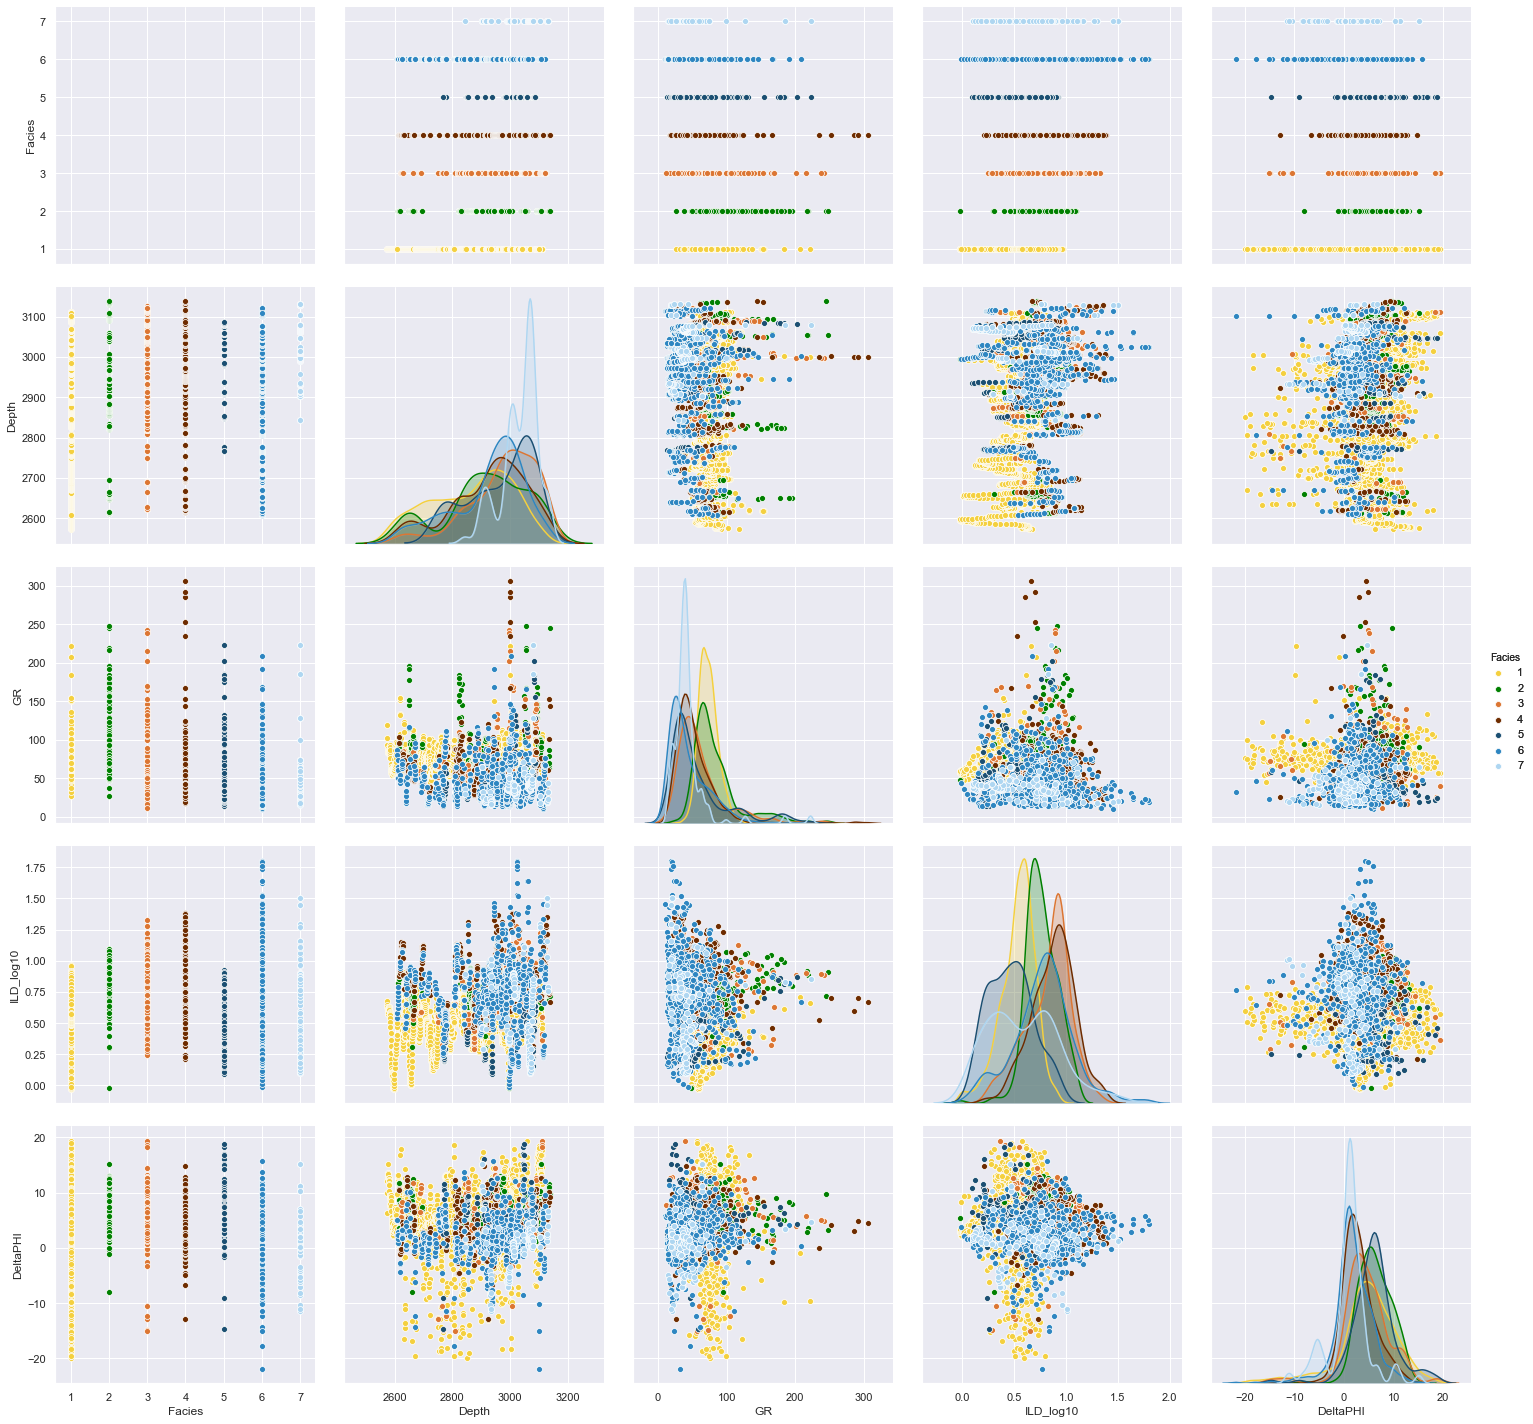

In [23]:
#Pairplot for each Features
plot = sns.pairplot(train1, hue="Facies", size=4.0, palette=['#F4D03F', '#008000','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#000000'])
plot.add_legend()
plot.savefig("output1.png")

# Naive Bayes

nilai akurasi adalah: 0.5435244161358811


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/christophersalim_/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/christophersalim_/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


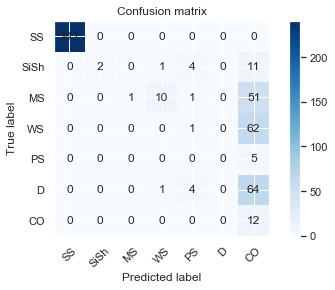

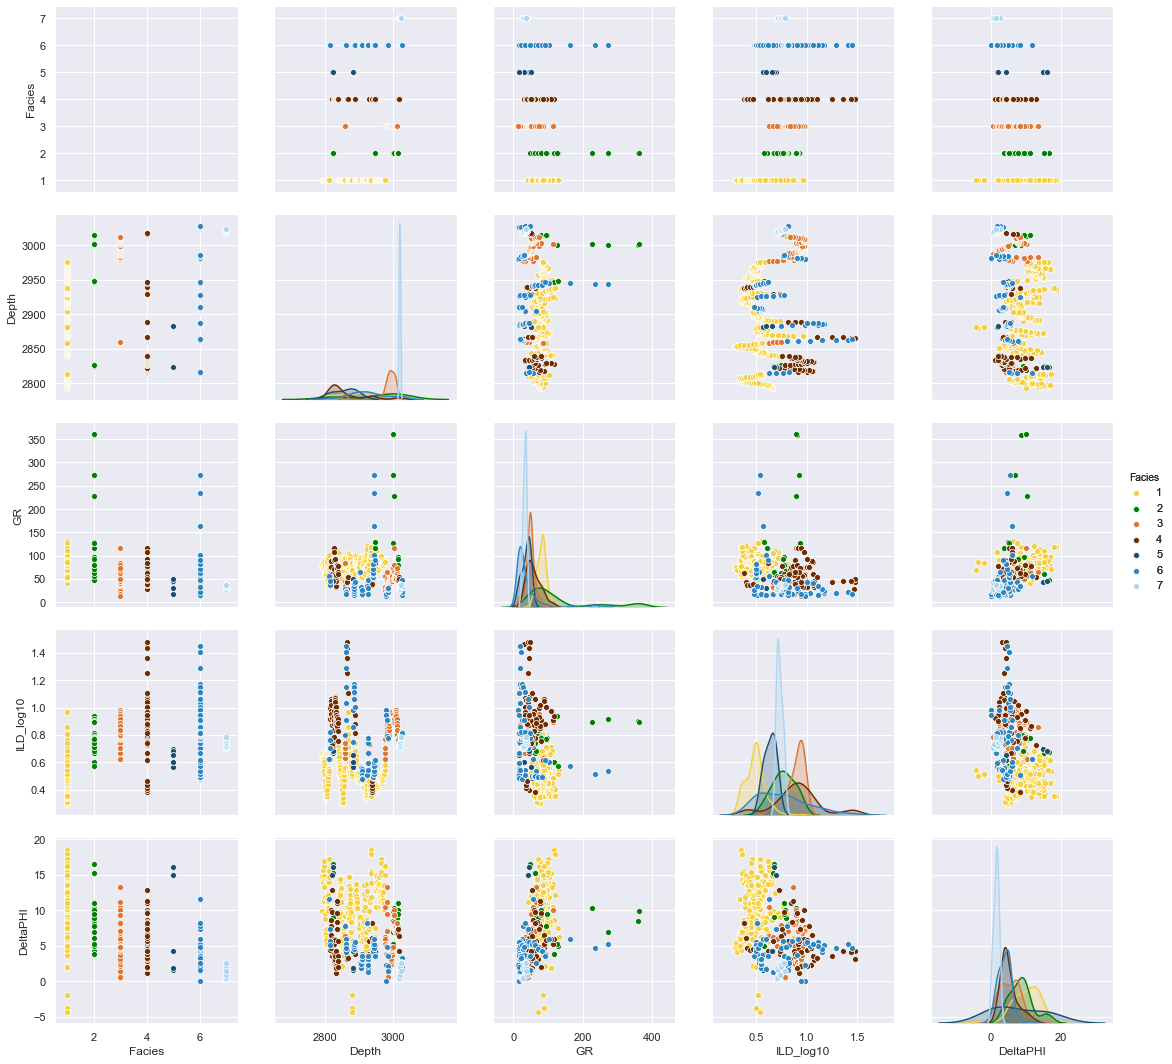

In [22]:
y_pred_nb = naivebayesclf(X, y, X_test)
test_nb = test1
test_nb['Facies'].replace(test_nb['Facies'].values, y_pred_nb)
sns.set(font_scale=1.0)
cm = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix('Naive Bayes', cm, ['SS', 'SiSh', 'MS', 'WS', 'PS', 'D', 'CO'])
acc_score = accuracy_score(y_test, y_pred_nb)
print("nilai akurasi adalah: " + str(acc_score))
plot_nb = sns.pairplot(test_nb, hue="Facies", size=3, palette=['#F4D03F', '#008000','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#000000'])
plot_nb.add_legend()
plot_nb.savefig("xplot_nb.png")

# Random Forest

nilai akurasi adalah: 0.7070063694267515


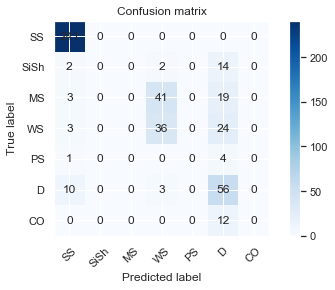

In [24]:
y_pred_rf = randomforestclf(X, y, X_test)
sns.set(font_scale=1.0)
cm = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix('Random Forest',cm, ['SS', 'SiSh', 'MS', 'WS', 'PS', 'D', 'CO'])
acc_score = accuracy_score(y_test, y_pred_rf)
print("nilai akurasi adalah: " + str(acc_score))
plot.savefig("rf1.png")

# SVM

nilai akurasi adalah: 0.673036093418259


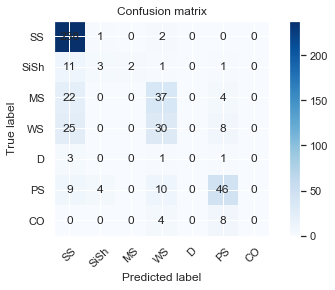

In [25]:
y_pred_svm = svmclf(X, y, X_test)
sns.set(font_scale=1.0)
cm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix('SVM', cm, ['SS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'CO'])
acc_score = accuracy_score(y_test, y_pred_svm)
print("nilai akurasi adalah: " + str(acc_score))

# KNN

nilai akurasi adalah: 0.6496815286624203


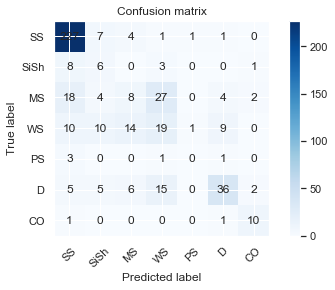

In [26]:
#K-Nearest Neighbor Classifier
def knnclf(x_train, y_train, x_test):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    return y_pred

def plot_confusion_matrix(filename, cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename)

In [ ]:
y_pred_knn = knnclf(X, y, X_test)
sns.set(font_scale=1.0)
cm = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix('KNN', cm, ['SS', 'SiSh', 'MS', 'WS', 'PS', 'D', 'CO'])
acc_score = accuracy_score(y_test, y_pred_knn)
print("nilai akurasi adalah: " + str(acc_score))
plot.savefig("knn.png")

# Decision Tree

nilai akurasi adalah: 0.6687898089171974


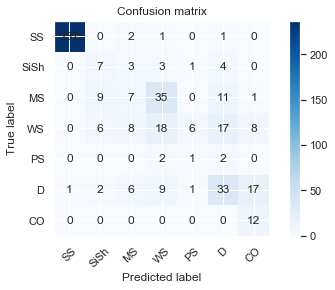

In [27]:
y_pred_dt = decisiontreeclf(X, y, X_test)
sns.set(font_scale=1.0)
cm = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix('Decision Tree', cm, ['SS', 'SiSh', 'MS', 'WS', 'PS', 'D', 'CO'])
acc_score = accuracy_score(y_test, y_pred_dt)
print("nilai akurasi adalah: " + str(acc_score))
plot.savefig("dt.png")

In [29]:
nb = pd.DataFrame(data=y_pred_nb, columns=['Naive Bayes'])
rf = pd.DataFrame(data=y_pred_rf, columns=['Random Forest'])
svm = pd.DataFrame(data=y_pred_svm, columns=['SVM'])
knn = pd.DataFrame(data=y_pred_rf, columns=['KNN'])
dt = pd.DataFrame(data=y_pred_rf, columns=['Decision Tree'])

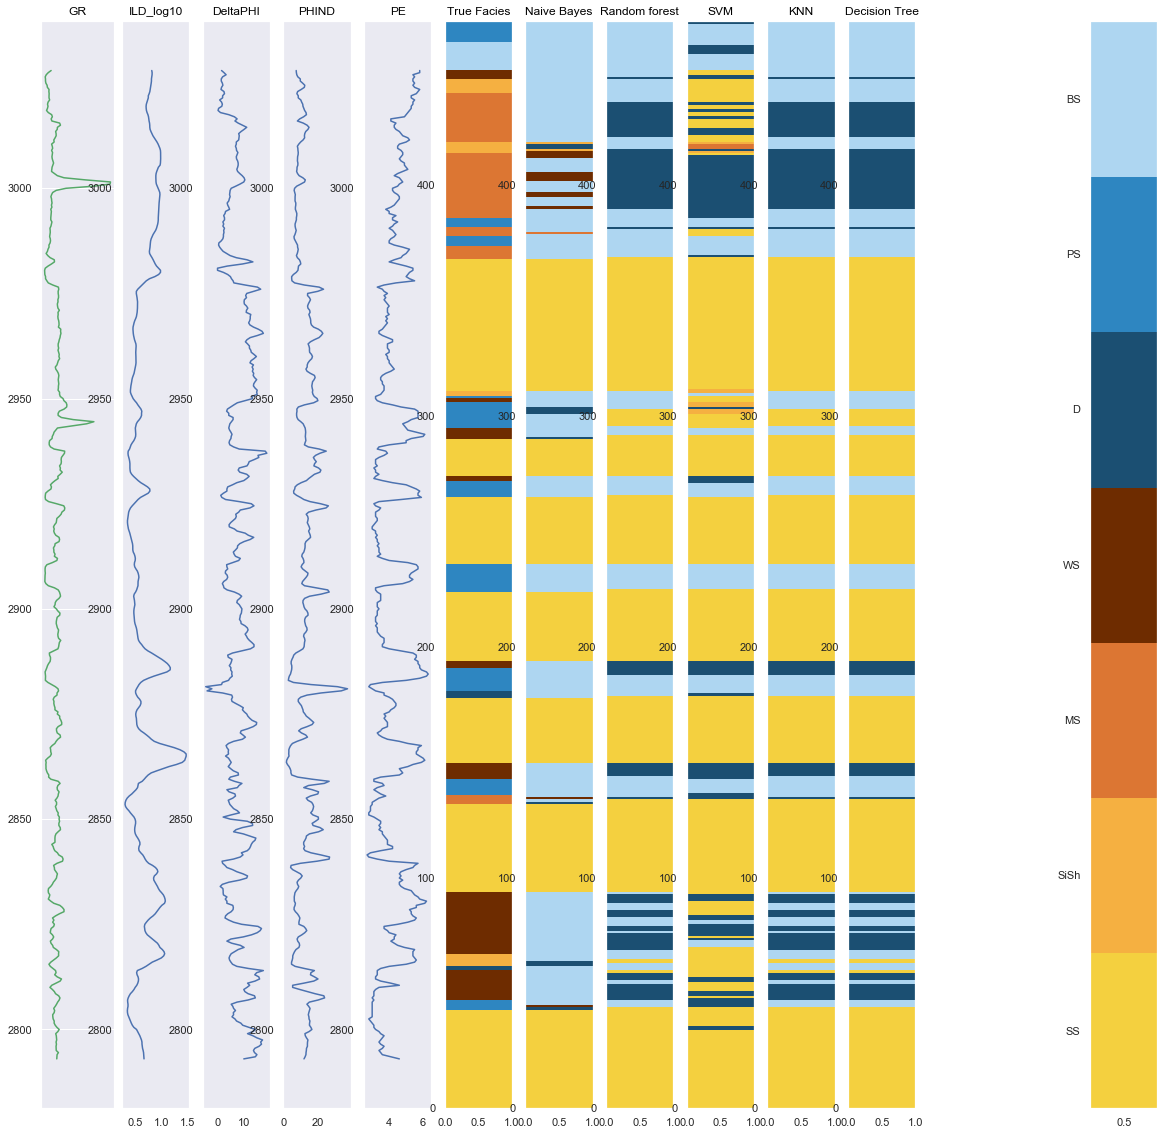

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mtp

# levels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#000000']

levels = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1']

cmap, norm = mtp.colors.from_levels_and_colors(levels, colors)
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
plt.figure(figsize=(20,20))
plt.title('Lithology Facies Prediction')
plt.subplot(1,13,1)
plt.plot(test[['GR']],test[["Depth"]],'-g')
plt.title('GR',fontdict = font)
# plt.grid('on')
plt.xticks([])
# plt.set_xticklabels([])


plt.subplot(1,14,2)
plt.plot(test[['ILD_log10']],test[["Depth"]])
plt.title('ILD_log10',fontdict = font)
plt.grid()

plt.subplot(1,14,3)
plt.plot(test[['DeltaPHI']],test[["Depth"]])
plt.title('DeltaPHI',fontdict = font)
plt.grid()

plt.subplot(1,14,4)
plt.plot(test[['PHIND']],test[["Depth"]])
plt.title('PHIND',fontdict = font)
plt.grid()

plt.subplot(1,14,5)
plt.plot(test[['PE']],test[["Depth"]])
plt.title('PE',fontdict = font)
plt.grid()

plt.subplot(1,14,6)
plt.pcolor(test[['Facies']], cmap=cmap)
plt.title('True Facies',fontdict = font)

plt.subplot(1,14,7)
plt.pcolor(nb[['Naive Bayes']], cmap=cmap)
plt.title('Naive Bayes',fontdict = font)

plt.subplot(1,14,8)
plt.pcolor(rf[['Random Forest']], cmap=cmap)
plt.title('Random forest',fontdict = font)

plt.subplot(1,14,9)
plt.pcolor(svm[['SVM']], cmap=cmap)
plt.title('SVM',fontdict = font)

plt.subplot(1,14,10)
plt.pcolor(knn[['KNN']], cmap=cmap)
plt.title('KNN',fontdict = font)

plt.subplot(1,14,11)
plt.pcolor(dt[['Decision Tree']], cmap=cmap)
plt.title('Decision Tree',fontdict = font)

facies_num = np.arange(1,8)
facies_num = np.reshape(facies_num, (-1, 1))


map = plt.subplot(1,14,14)

map.pcolor(facies_num,cmap = cmap)


map.set_xticks(np.arange(facies_num.shape[1]) + 0.5, minor=False)
map.set_yticks(np.arange(facies_num.shape[0]) + 0.5, minor=False)
map.set_yticklabels(list(facies_names), minor=False)





plt.savefig('Result.png')
plt.show()